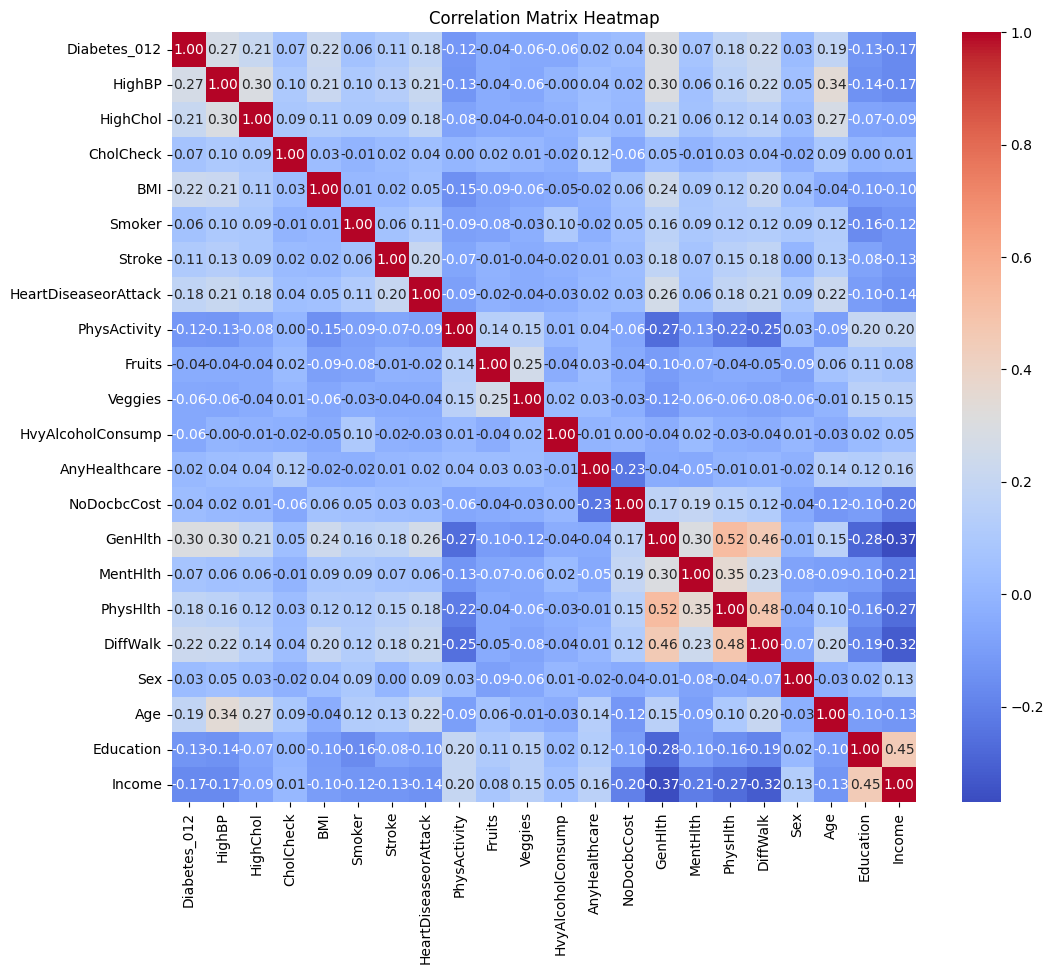

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

url = 'https://drive.google.com/uc?id=1qKlywkZUCyQkLYDFOs_T8YUaW-TG6mEb'

# Read CSV
df = pd.read_csv(url)

correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))  # Optional: Make plot bigger for readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()



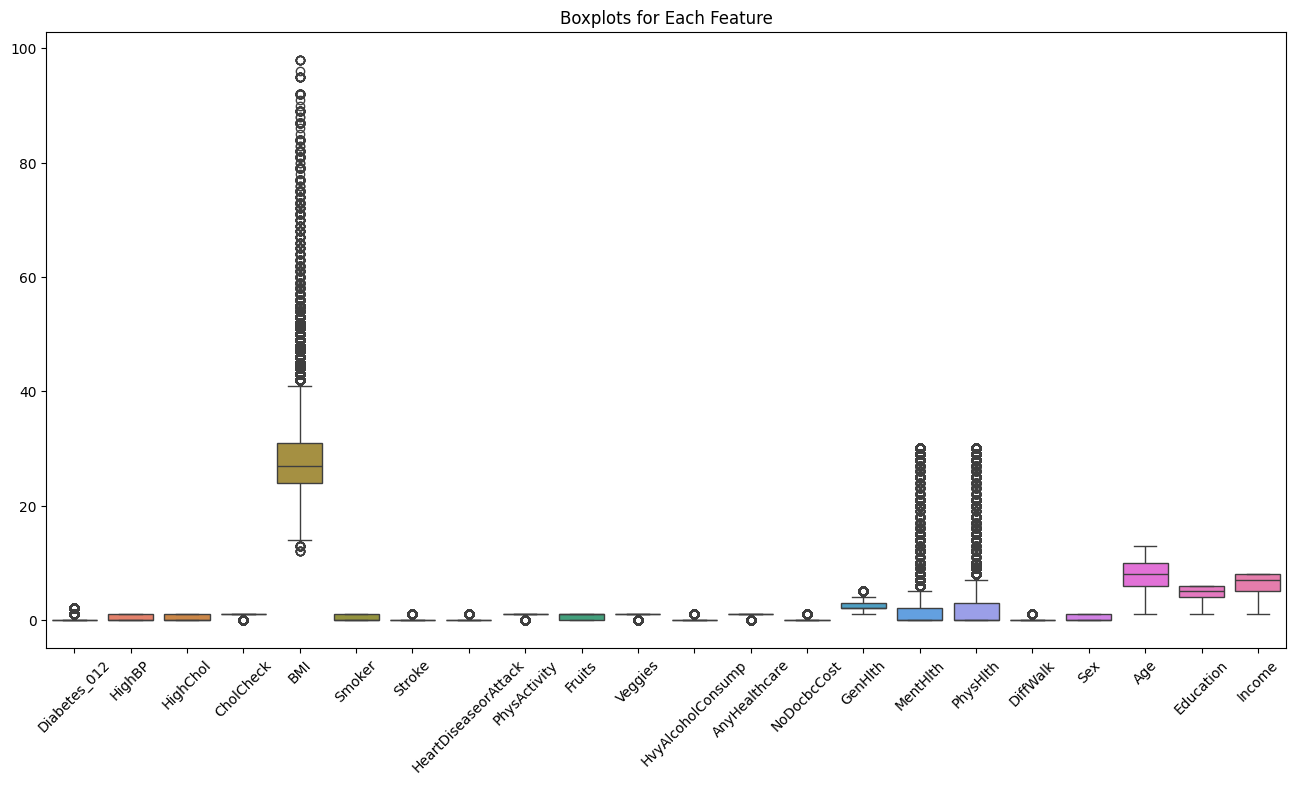

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Correct downloadable link
url = 'https://drive.google.com/uc?id=1qKlywkZUCyQkLYDFOs_T8YUaW-TG6mEb'

# Read CSV
df = pd.read_csv(url)

# Plot boxplots
plt.figure(figsize=(16, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Boxplots for Each Feature')
plt.show()


In [9]:
# Step 1: Identify binary and continuous columns
binary_cols = [col for col in df.columns if sorted(df[col].dropna().unique()) == [0, 1]]
continuous_cols = [col for col in df.columns if col not in binary_cols]

print("Binary columns:", binary_cols)
print("Continuous columns:", continuous_cols)

# Step 2: Calculate Q1, Q2, Q3, IQR only for continuous columns
Q1 = df[continuous_cols].quantile(0.25)
Q2 = df[continuous_cols].quantile(0.50)  # Median
Q3 = df[continuous_cols].quantile(0.75)
IQR = Q3 - Q1

print("\nQ1:\n", Q1)
print("\nQ2 (Median):\n", Q2)
print("\nQ3:\n", Q3)
print("\nIQR:\n", IQR)

# Step 3: Remove outliers for continuous columns only
# (Binary columns are untouched)
filter_condition = ~((df[continuous_cols] < (Q1 - IQR)) | (df[continuous_cols] > (Q3 + IQR))).any(axis=1)
df_clean = df[filter_condition]

print("\nOriginal shape:", df.shape)
print("Cleaned shape:", df_clean.shape)


Binary columns: ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
Continuous columns: ['Diabetes_012', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

Q1:
 Diabetes_012     0.0
BMI             24.0
GenHlth          2.0
MentHlth         0.0
PhysHlth         0.0
Age              6.0
Education        4.0
Income           5.0
Name: 0.25, dtype: float64

Q2 (Median):
 Diabetes_012     0.0
BMI             27.0
GenHlth          2.0
MentHlth         0.0
PhysHlth         0.0
Age              8.0
Education        5.0
Income           7.0
Name: 0.5, dtype: float64

Q3:
 Diabetes_012     0.0
BMI             31.0
GenHlth          3.0
MentHlth         2.0
PhysHlth         3.0
Age             10.0
Education        6.0
Income           8.0
Name: 0.75, dtype: float64

IQR:
 Diabetes_012    0.0
BMI             7.0
GenHlth         1.0
MentHlth

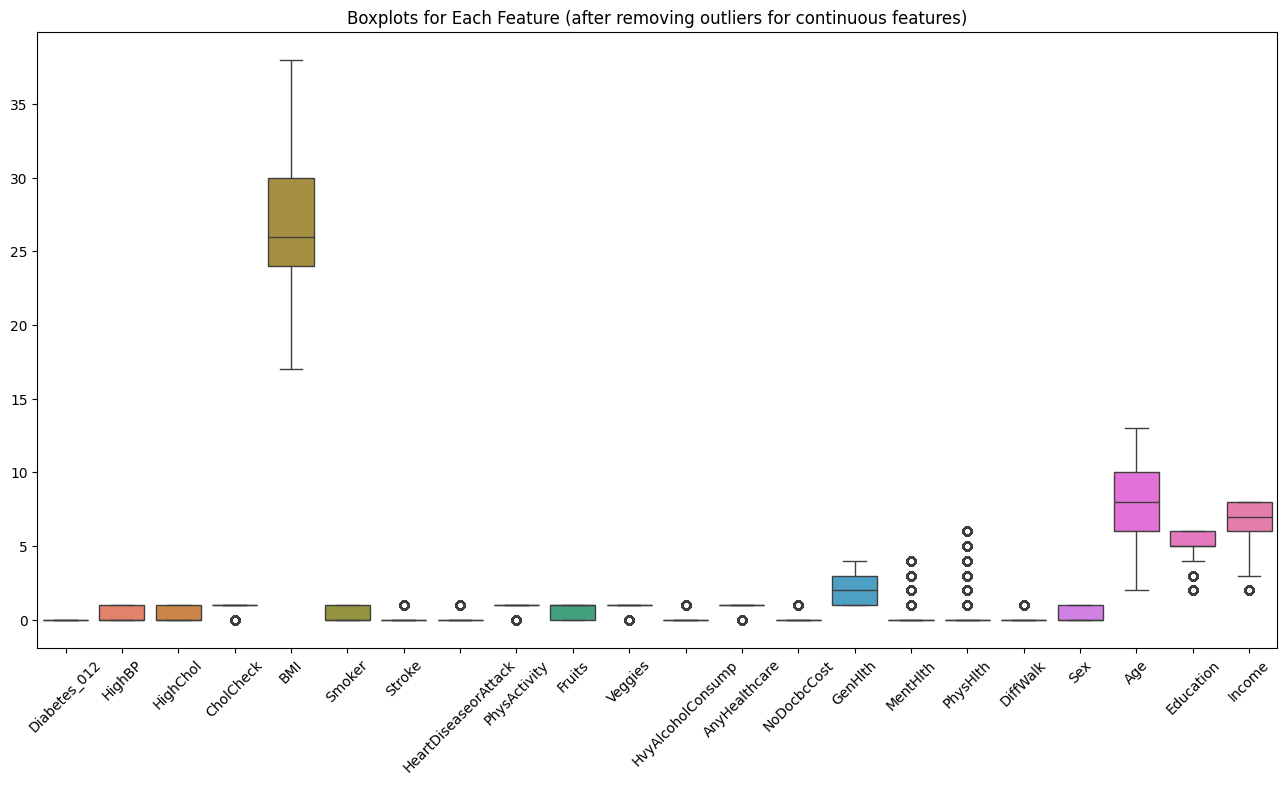

In [11]:
# Plot boxplots
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_clean)
plt.xticks(rotation=45)
plt.title('Boxplots for Each Feature (after removing outliers for continuous features)')
plt.show()